In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings

In [170]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [171]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [172]:
#Change headers names

cols = [col.lower() for col in data.columns]

In [173]:
data.columns = cols

In [174]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [175]:
#Droping the duplicates

data.drop_duplicates()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [177]:
data._get_numeric_data()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [178]:
data.select_dtypes('object')

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [179]:
categorical = data.select_dtypes('object')
numerical = data._get_numeric_data()

In [180]:
categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

In [181]:
numerical.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

In [ ]:
#Dealing with outliers.

In [182]:
numerical['income'] = numerical['income'].replace(0, numerical['income'].mean())

In [183]:
numerical.drop(['months since policy inception', 'number of open complaints', 'number of policies' ],axis = 1,inplace = True)

In [184]:
categorical.drop(['location code'],axis = 1,inplace = True)

In [185]:
numerical

,customer lifetime value,income,monthly premium auto,months since last claim,total claim amount
0,2763.519279,56274.000000,69,32,384.811147
1,6979.535903,37657.380009,94,13,1131.464935
2,12887.431650,48767.000000,108,18,566.472247
3,7645.861827,37657.380009,106,18,529.881344
4,2813.692575,43836.000000,73,12,138.130879
...,...,...,...,...,...
9129,23405.987980,71941.000000,73,18,198.234764
9130,3096.511217,21604.000000,79,14,379.200000
9131,8163.890428,37657.380009,85,9,790.784983
9132,7524.442436,21941.000000,96,34,691.200000


In [186]:
categorical

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [187]:
numerical = numerical.dropna(axis=0)
print(numerical)

      customer lifetime value        income  monthly premium auto  \
0                 2763.519279  56274.000000                    69   
1                 6979.535903  37657.380009                    94   
2                12887.431650  48767.000000                   108   
3                 7645.861827  37657.380009                   106   
4                 2813.692575  43836.000000                    73   
...                       ...           ...                   ...   
9129             23405.987980  71941.000000                    73   
9130              3096.511217  21604.000000                    79   
9131              8163.890428  37657.380009                    85   
9132              7524.442436  21941.000000                    96   
9133              2611.836866  37657.380009                    77   

      months since last claim  total claim amount  
0                          32          384.811147  
1                          13         1131.464935  
2              

In [231]:
#My NaN values
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

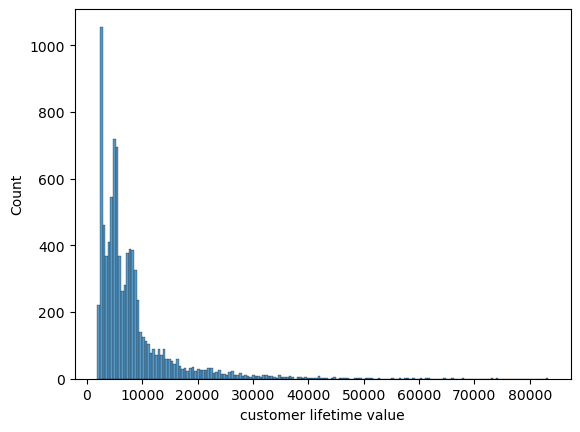

In [188]:
#Normalize

sns.histplot(numerical['customer lifetime value'])
plt.show()

In [189]:
numerical['customer_log'] = np.log(numerical['customer lifetime value'])

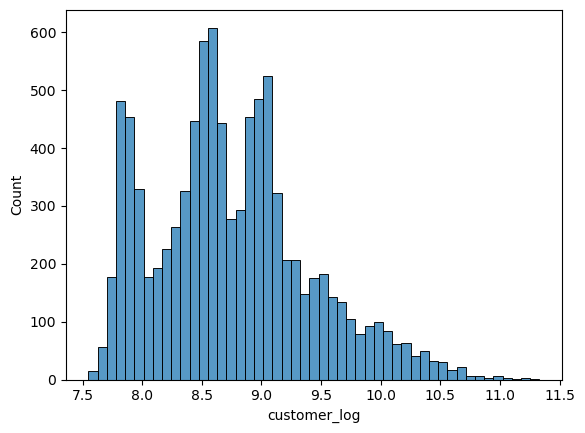

In [190]:
sns.histplot(numerical['customer_log'])
plt.show()

In [191]:
# Encoding Categorical Data.

for col in categorical.columns:
    one_hot = pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(categorical[col])).transform(pd.DataFrame(categorical[col])).toarray())

In [193]:
one_hot

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9129,0.0,1.0,0.0
9130,0.0,1.0,0.0
9131,0.0,1.0,0.0
9132,1.0,0.0,0.0


In [198]:
X2 = numerical.drop(['total claim amount'],axis = 1)
Y = numerical['total claim amount']

In [201]:
X2

,customer lifetime value,income,monthly premium auto,months since last claim,customer_log
0,2763.519279,56274.000000,69,32,7.924260
1,6979.535903,37657.380009,94,13,8.850738
2,12887.431650,48767.000000,108,18,9.464008
3,7645.861827,37657.380009,106,18,8.941920
4,2813.692575,43836.000000,73,12,7.942253
...,...,...,...,...,...
9129,23405.987980,71941.000000,73,18,10.060747
9130,3096.511217,21604.000000,79,14,8.038031
9131,8163.890428,37657.380009,85,9,9.007476
9132,7524.442436,21941.000000,96,34,8.925912


In [202]:
X = pd.DataFrame(np.concatenate((X2, one_hot), axis=1))

In [222]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=400)

In [223]:
model = sm.OLS(y_train, X_train).fit()

In [224]:
predictions = model.predict(X_test)

In [225]:
r2_score(y_test, predictions)

0.4961352703597254

In [226]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(mse)

42801.8375632691


In [227]:
import math

rmse = math.sqrt(mse)
print(rmse)

206.88604970676275


In [228]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print(mae)

143.30921663054863


In [229]:
corr_matrix = np.corrcoef(y_test, predictions)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.49947282199617976


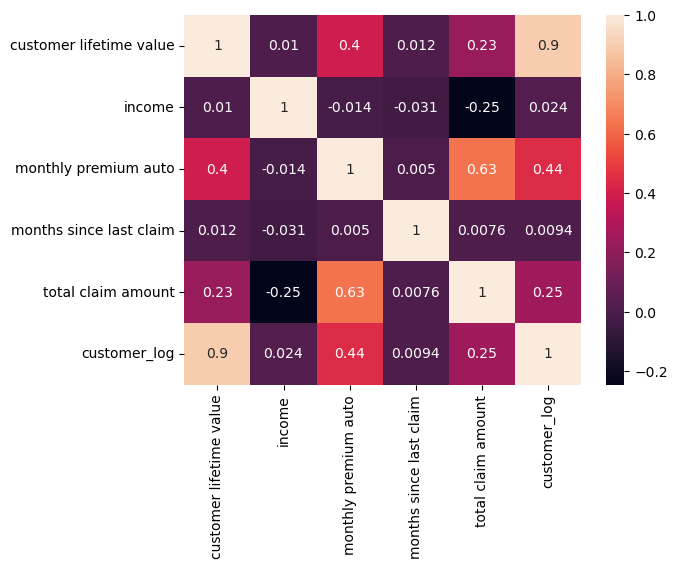

In [230]:
sns.heatmap(numerical.corr(), annot = True)
plt.show()

# Function Lab 2 and Lab 7

In [232]:
def Finalab():
    data_Lab2 = pd.read_csv('marketing_customer_analysis.csv')
    
    #Lab2 - Standardize header names
    cols_Lab2 = []
    for column in range (len(data_Lab2.columns)):
        cols_Lab2.append(data_Lab2.columns[column].lower())
    data_Lab2.columns = cols_Lab2
    
    #Lab2 - Drop columns
    if 'unnamed: 0' and 'vehicle type' in data_Lab2.columns:
        data_Lab2.drop(['unnamed: 0','vehicle type'], axis=1,inplace=True)
    
    #Lab2 - Delete duplicated values
    data_Lab2.drop_duplicates()
    
    #Lab2 - Delete all the lines with NaN values
    data_Lab2 = data_Lab2.dropna(axis=0)
    
    #Lab2 - Convert the column effective to datetime format
    data_Lab2['effective to date'] = pd.to_datetime(data_Lab2['effective to date'],errors='coerce')
    
    #Lab2 - Create a column named month
    data_Lab2['month'] = data_Lab2['effective to date'].dt.month
    
    #Merge the result from Lab2 into Lab7
    data_Lab7 = data_Lab2
    
    #Lab7 - Split the dataframe between 2 types, categorical and numerical
    categorical_lab7 = data_Lab7.select_dtypes('object')
    numerical_lab7 = data_Lab7._get_numeric_data()
    
    #Lab7 - Scaling the numerical variables
    pd.DataFrame(MinMaxScaler().fit(numerical_lab7).transform(numerical_lab7))
    
    #Split X and Y
    X_Lab7 = numerical_lab7.drop(['total claim amount'],axis = 1)
    Y_Lab7 = numerical_lab7['total claim amount']
    
    
    #Lab7 - Scaling the categorical variables
    for col in categorical_lab7.columns:
        one_hot_lab7 = pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(categorical_lab7[col])).transform(pd.DataFrame(categorical_lab7[col])).toarray())
    
    X2_Lab7 = pd.DataFrame(np.concatenate((X_Lab7, one_hot_lab7), axis=1))
    
    #Lab7 - train test split
    X_train, X_test, y_train, y_test = train_test_split(X2_Lab7,Y_Lab7,test_size=0.8,random_state=400)      
    model = sm.OLS(y_train, X_train).fit()
    predictions_Lab7 = model.predict(X_test)
    
    linear_regression = r2_score(y_test, predictions_Lab7)
    return "My R-Squared value is " + str(linear_regression)



In [233]:
Finalab()

'My R.Squared value is 0.5275726886618947'